In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import math
from utils.manifold_metrices import *


In [2]:
# load data
result_path = '../results/Ach-ver16/figures-for-ver16-final6/manifold-SRD-long-formal--3-40'
folder_name = 'cv_merge'
filename_train = 'data_merge_train.npy'
filename_test = 'data_merge_test.npy'
# statistics choice
statistics_choice = 'inter_cluster_distance' # 'inter_cluster_distance', 'within_cluster_distance','distance_ratio','distance_from_origin'
if_save = False
if if_save:
    figure_save_path = result_path +'/'+statistics_choice
    f = os.path.exists(figure_save_path)
    if not f:
        os.makedirs(figure_save_path)
# segement length: 3 for 'inter_cluster_distance','distance_from_origin'; 9 for 'within_cluster_distance'
trial_seg_len = 3
num_trial = 180
num_dim = 2
time_range = range(0,43)

stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])


In [3]:
data_merge_train = np.load(result_path+'/'+folder_name+'/'+filename_train)
data_merge_train = data_merge_train[:,:,time_range,:,:]
print(np.shape(data_merge_train))
data_merge_test = np.load(result_path+'/'+folder_name+'/'+filename_test)
data_merge_test = data_merge_test[:,:,time_range,:,:]
print(np.shape(data_merge_test))

(10, 3, 43, 180, 2)
(10, 3, 43, 180, 2)


In [4]:
num_fly = np.size(data_merge_train,0)
num_channel_choice = np.size(data_merge_train,1)
distance_inter_cluster_train = np.zeros((num_fly,num_channel_choice,4,len(time_range),int(num_trial/trial_seg_len)))
distance_inter_cluster_test = np.zeros((num_fly,num_channel_choice,4,len(time_range),int(num_trial/trial_seg_len)))
trial_flag = np.array(range(num_trial))
for ii in range(num_fly):
    for j in range(num_channel_choice):
        data_train = np.squeeze(data_merge_train[ii,j,:,:,:]) 
        data_test = np.squeeze(data_merge_test[ii,j,:,:,:]) 
        for pp in range(int(num_trial/trial_seg_len)):
            ind = np.array(trial_flag>=pp*trial_seg_len) * np.array(trial_flag<(pp+1)*trial_seg_len)
            if statistics_choice == 'inter_cluster_distance':
                distance_inter_cluster_train[ii,j,:,:,pp] = compute_distance_inter_cluster(data_train[:,ind,:],stim[ind])
                distance_inter_cluster_test[ii,j,:,:,pp] = compute_distance_inter_cluster(data_test[:,ind,:],stim[ind])
            elif statistics_choice == 'within_cluster_distance':
                distance_inter_cluster_train[ii,j,:,:,pp] = compute_distance_within_cluster(data_train[:,ind,:],stim[ind])
                distance_inter_cluster_test[ii,j,:,:,pp] = compute_distance_within_cluster(data_test[:,ind,:],stim[ind])
            elif statistics_choice == 'distance_ratio':
                aa = compute_distance_within_cluster(data_train[:,ind,:],stim[ind])
                bb = compute_distance_inter_cluster(data_train[:,ind,:],stim[ind])
                cc = aa/bb
                cc[np.isnan(cc)] = 0
                cc[np.isinf(cc)] = 0
                distance_inter_cluster_train[ii,j,:,:,pp] = cc
                distance_inter_cluster_train[ii,j,:,0,pp] = 0
                aa = compute_distance_within_cluster(data_test[:,ind,:],stim[ind])
                bb = compute_distance_inter_cluster(data_test[:,ind,:],stim[ind])
                cc = aa/bb
                cc[np.isnan(cc)] = 0
                cc[np.isinf(cc)] = 0
                distance_inter_cluster_test[ii,j,:,:,pp] = cc
                distance_inter_cluster_test[ii,j,:,0,pp] = 0
            elif statistics_choice == 'distance_from_origin':
                distance_inter_cluster_train[ii,j,:,:,pp] = compute_distance_from_origin(data_train[:,ind,:],stim[ind])
                distance_inter_cluster_test[ii,j,:,:,pp] = compute_distance_from_origin(data_test[:,ind,:],stim[ind])


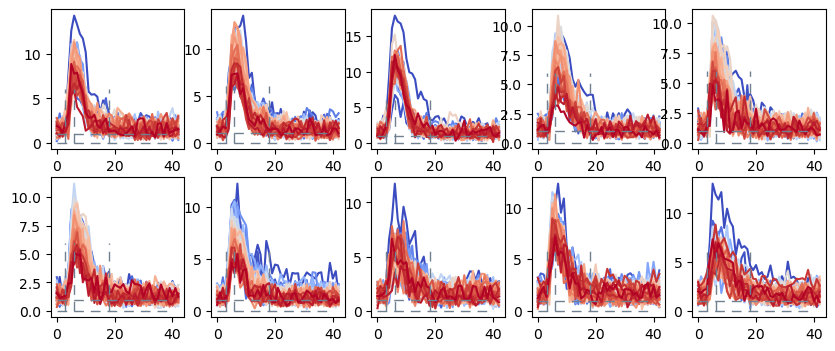

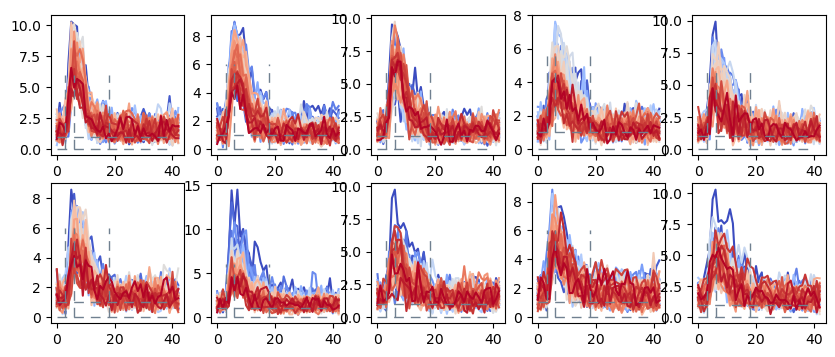

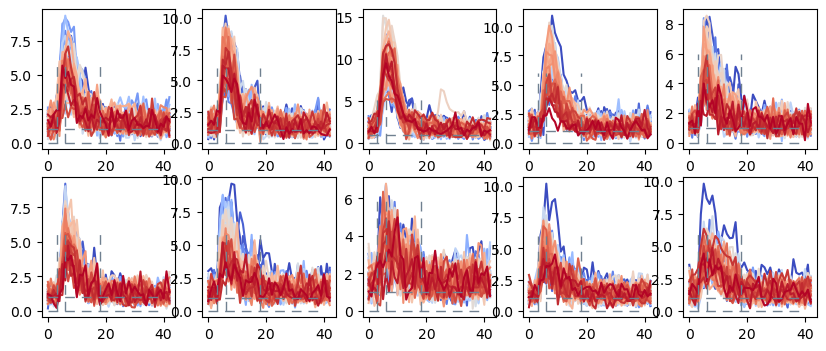

In [5]:
train_test = 1
odor_selected = 0
for j in range(num_channel_choice):
    plt.figure(figsize = (10,4))
    for i in range(num_fly):
        plt.subplot(2,5,i+1)
        fly_selected = i
        channel_selected = j
        if train_test == 0:
            the_data = np.squeeze(distance_inter_cluster_train[fly_selected,channel_selected,odor_selected,:,:])
        else:
            the_data = np.squeeze(distance_inter_cluster_test[fly_selected,channel_selected,odor_selected,:,:])

        cmap = 'coolwarm'
        colors = color_map(range(int(num_trial/trial_seg_len)), cmap)


        for pp in range(int(num_trial/trial_seg_len)):
            plt.plot(np.squeeze(the_data[:,pp]),color = colors[pp])
        plt.plot([3,3],[0,6],'--', linewidth=1, markersize=6, dashes = (7,5),color='slategray')
        plt.plot([6,6],[0,6],'--', linewidth=1, markersize=6, dashes = (7,5),color='slategray')
        plt.plot([18,18],[0,6],'--', linewidth=1, markersize=6, dashes = (7,5),color='slategray')
        plt.plot([0,40],[1,1],'--', linewidth=1, markersize=6, dashes = (7,5),color='slategray')
        plt.plot([0,40],[0,0],'--', linewidth=1, markersize=6, dashes = (7,5),color='slategray')

    if if_save:
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        plt.savefig(figure_save_path + '/' + statistics_choice+'_'+'channel_'+str(channel_selected)+'_train_test_'+str(train_test)+'_odor_selected_'+str(odor_selected)+'.png',dpi = 300,bbox_inches = 'tight')
        plt.savefig(figure_save_path + '/' + statistics_choice+'_'+'channel_'+str(channel_selected)+'_train_test_'+str(train_test)+'_odor_selected_'+str(odor_selected)+'.pdf',dpi = 300,bbox_inches = 'tight')
        np.save(figure_save_path + '/' + statistics_choice+'_train.npy',distance_inter_cluster_train)
        np.save(figure_save_path + '/' + statistics_choice+'_test.npy',distance_inter_cluster_test)
    plt.show()

In [6]:
print(np.shape(distance_inter_cluster_train))
print(np.shape(distance_inter_cluster_test))

(10, 3, 4, 43, 60)
(10, 3, 4, 43, 60)


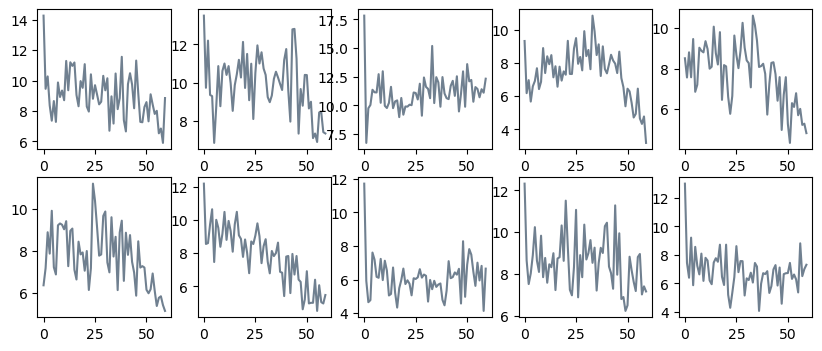

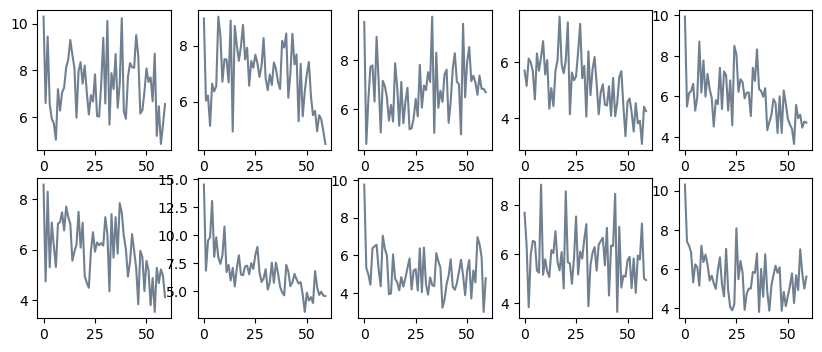

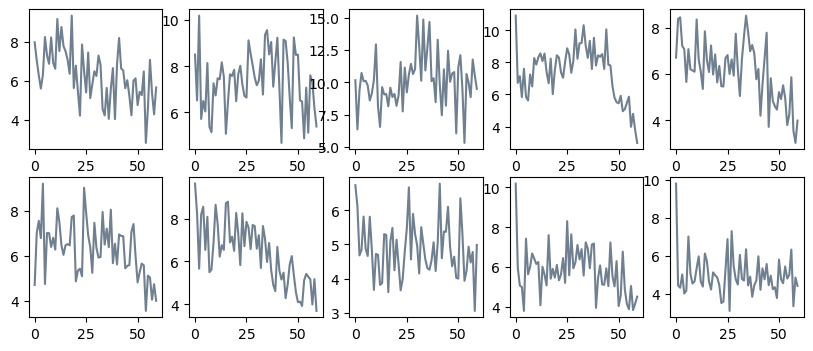

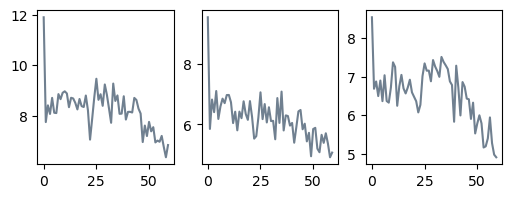

In [7]:
# max distance
train_test = 1
odor_selected = 0
tp_range_selected = range(0,43)
if train_test == 0:
    the_distance = np.max(np.squeeze(distance_inter_cluster_train[:,:,odor_selected,tp_range_selected,:]),2)
else:
    the_distance = np.max(np.squeeze(distance_inter_cluster_test[:,:,odor_selected,tp_range_selected,:]),2)
for i in range(num_channel_choice):
    plt.figure(figsize=(10,4))
    for j in range(num_fly):
        plt.subplot(2,5,j+1)
        plt.plot(np.squeeze(the_distance[j,i,:]),color = 'slategray')
plt.figure(figsize=(6,2))
for i in range(num_channel_choice):
    plt.subplot(1,3,i+1)
    the_mean = np.mean(np.squeeze(the_distance[:,i,:]),0)
    the_std = np.std(np.squeeze(the_distance[:,i,:]),0,ddof = 1)/math.sqrt(num_fly)
    plt.plot(the_mean,color = 'slategray')



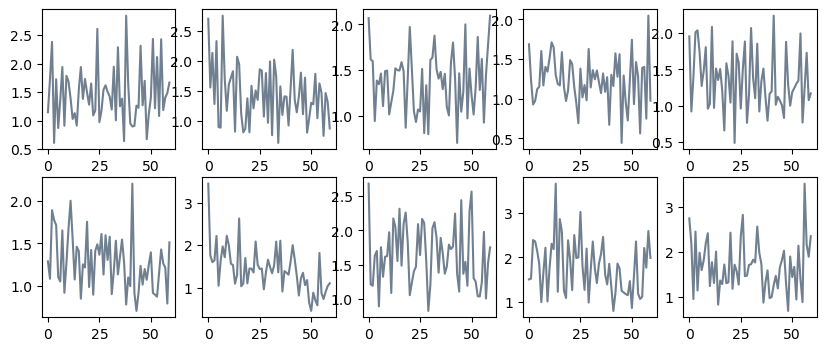

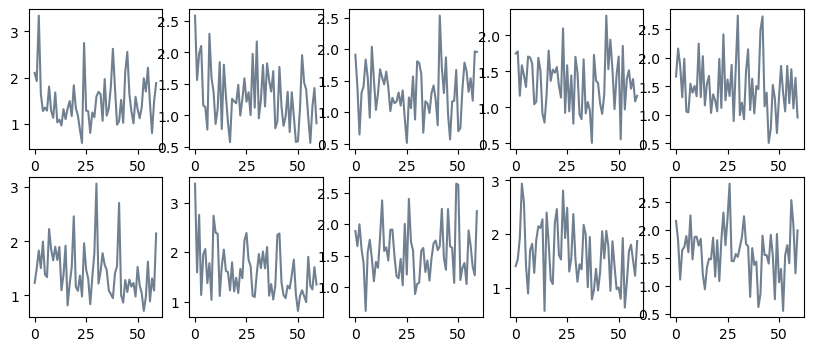

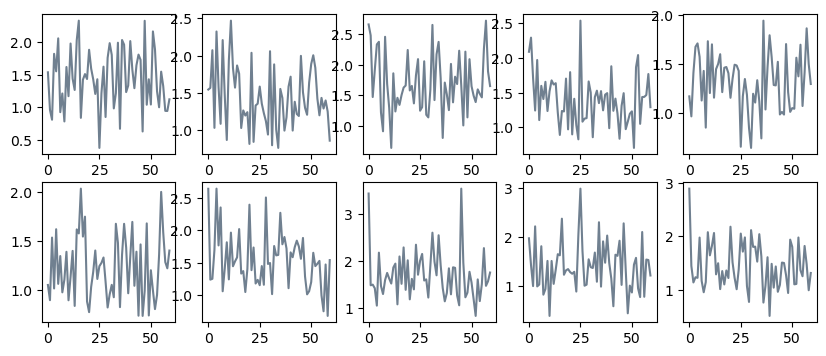

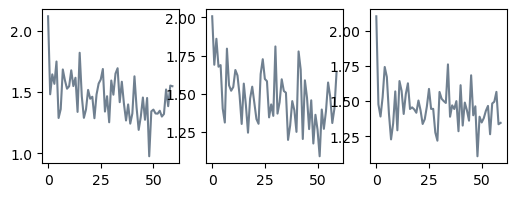

In [8]:
# return distance
train_test = 1
odor_selected = 0
tp_range_selected = range(38,40)
if train_test == 0:
    the_distance = np.mean(np.squeeze(distance_inter_cluster_train[:,:,odor_selected,tp_range_selected,:]),2)
else:
    the_distance = np.mean(np.squeeze(distance_inter_cluster_test[:,:,odor_selected,tp_range_selected,:]),2)
for i in range(num_channel_choice):
    plt.figure(figsize=(10,4))
    for j in range(num_fly):
        plt.subplot(2,5,j+1)
        plt.plot(np.squeeze(the_distance[j,i,:]),color = 'slategray')
plt.figure(figsize=(6,2))
for i in range(num_channel_choice):
    plt.subplot(1,3,i+1)
    the_mean = np.mean(np.squeeze(the_distance[:,i,:]),0)
    the_std = np.std(np.squeeze(the_distance[:,i,:]),0,ddof = 1)/math.sqrt(num_fly)
    plt.plot(the_mean,color = 'slategray')

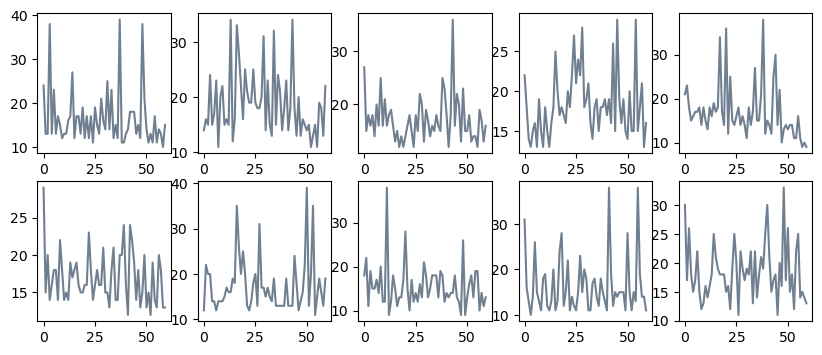

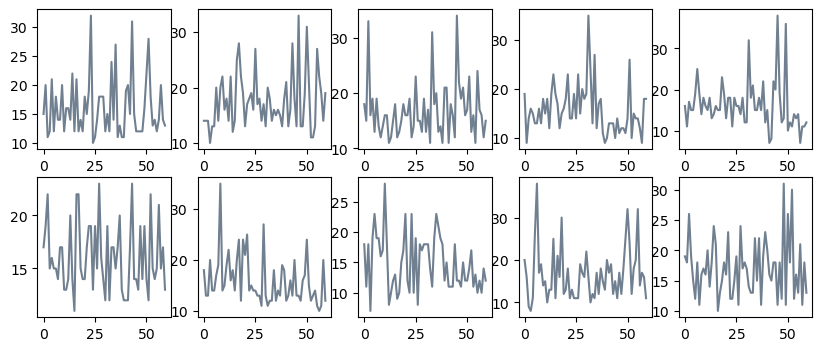

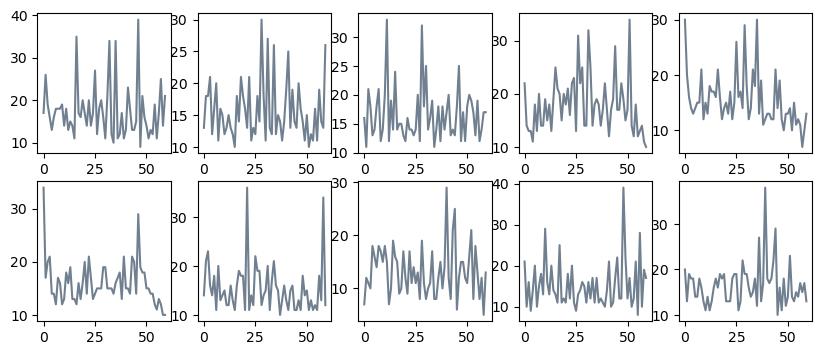

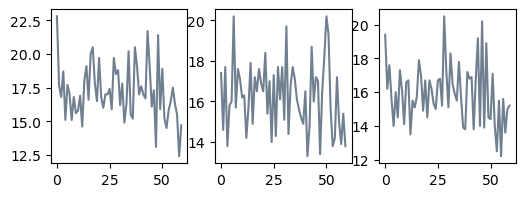

In [9]:
# return time
train_test = 1
odor_selected = 0
tp_range_selected = range(38,40)
thresh_m = 0.1
if train_test == 0:
    the_distance = np.squeeze(distance_inter_cluster_train[:,:,odor_selected,:,:])
else:
    the_distance = np.squeeze(distance_inter_cluster_test[:,:,odor_selected,:,:])

the_return_level = np.mean(the_distance[:,:,tp_range_selected,:],2)
the_return_time = np.zeros((num_fly,num_channel_choice,np.size(the_distance,3)))
for i in range(num_channel_choice):
    for j in range(num_fly):
        for pp in range(np.size(the_distance,3)):
            a = np.squeeze(the_distance[j,i,:,pp])
            max_tp = np.argmax(a[0:20])
            inds = np.array(np.where(a[max_tp:]<the_return_level[j,i,pp]*(1+thresh_m)))
            inds = inds.flatten()
            the_return_time[j,i,pp] = inds[0]+max_tp
for i in range(num_channel_choice):
    plt.figure(figsize=(10,4))
    for j in range(num_fly):
        plt.subplot(2,5,j+1)
        plt.plot(np.squeeze(the_return_time[j,i,:]),color = 'slategray')
plt.figure(figsize=(6,2))
for i in range(num_channel_choice):
    plt.subplot(1,3,i+1)
    the_mean = np.mean(np.squeeze(the_return_time[:,i,:]),0)
    the_std = np.std(np.squeeze(the_return_time[:,i,:]),0,ddof = 1)/math.sqrt(num_fly)
    plt.plot(the_mean,color = 'slategray')